In [12]:
import os
import pandas as pd

base_folder="."

classes=['Canon','Epson','Hp']

data=[]

for cls in classes:
    folder=os.path.join(base_folder,cls)
    
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        data.append([img_path,cls.lower()])
        
df=pd.DataFrame(data,columns=['Image','Brand'])
    

In [13]:
df_suffle=df.sample(frac=1).reset_index(drop=True)
df_suffle.head(10)

,Image,Brand
0,.\Canon\s2_23.tif,canon
1,.\Epson\s9_33.tif,epson
2,.\Epson\s8_28.tif,epson
3,.\Hp\s11_31.tif,hp
4,.\Epson\s7_33.tif,epson
5,.\Canon\s4_17.tif,canon
6,.\Hp\s11_89.tif,hp
7,.\Canon\s4_11.tif,canon
8,.\Epson\s7_15.tif,epson
9,.\Epson\s6_28.tif,epson


In [14]:
from PIL import Image

def image_analyse(path):
    img=Image.open(path)
    print("Image mode (Channel Code)",img.mode)
    print("Image_size(Pixels)",img.size)
    print("DPI", img.info.get("dpi"))

for p in df['Image'].head(1):
    image_analyse(p)

Image mode (Channel Code) RGB
Image_size(Pixels) (2480, 3508)
DPI (301.0, 301.0)


In [ ]:
import cv2
import numpy as np
def preprocessing_size(img,size=(224,224)):
    return cv2.resize(img,size,interpolation=cv2.INTER_AREA)

def gray_scale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

def noise(img):
    return cv2.GaussianBlur(img, (5,5), 0)


def back_noise(img):
    return cv2.adaptiveThreshold(
        img,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        15,
        10
    )
    
def normalize(img):
    return img/255.0


def load_tiff(path):
    return np.array(Image.open(path))
    

In [ ]:
def preprocessing(path):
    img=load_tiff(path)
    img=gray_scale(img)
    img = noise(img)
    img = back_noise(img)
    img=preprocessing_size(img,(224,224))
    img=normalize(img)
    img=img.reshape(224,224,1)
    return img

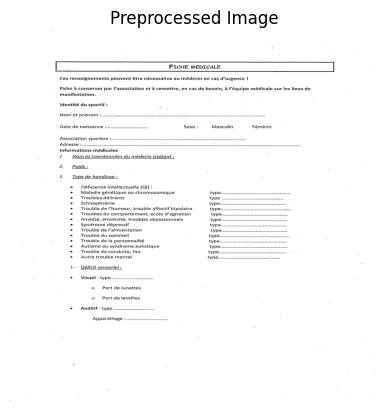

In [17]:
import matplotlib.pyplot as plt

path = df_suffle['Image'].iloc[0]

img = preprocessing(path)

plt.imshow(img.squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()


In [18]:
X=[]
y=[]

for idx,row in df_suffle.iterrows():
    img=preprocessing(row['Image'])
    X.append(img)
    y.append(row['Brand'])

In [19]:
X=np.array(X)
X

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[0.48235294],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.17254902],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.17254902],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [20]:
df_suffle.to_csv("Scan_dataset.csv", index=False)